![title](static/wcar.png)
# Interacting Partners for TbGPI3
    Zhe Ji, Michele Tinti and Michael A.J. Ferguson

    Wellcome Centre for Anti-Infectives Research
    School of Life Sciences, University of Dundee

In [1]:
#reload library if modified
%load_ext autoreload
%autoreload 2

In [41]:
#import sys
#sys.path.insert(0, 'ProLib/')
#sys.path.insert(0, 'Users/mtinti/Desktop/git_projects/protUtil/ProLib/ProteomicsUtility/')

In [3]:
#!ln -s /Users/mtinti/Desktop/git_projects/protUtil/ProLib ProLib

In [4]:
import os
import utilities as PTUT
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import ProtRank
import gc
plt.style.use('ggplot')

## Load Data

In [5]:
#list(df.columns)

In [6]:
KnownComponents={
'Tb11.v5.0765': 'TbPIGA',
'Tb927.5.3680': 'TbPIGH',
'Tb927.10.10110': 'TbPIGP',
'Tb927.10.6140': 'TbPIGC',
'Tb927.3.4570': 'TbPIGQ',
'Tb927.4.780': 'TbPIGY',
'Tb927.10.4610': 'TbDPM1',
'Tb927.9.6440': 'TbDPM2',
'Tb927.3.2480':'TbArv1'}

In [7]:
#PTUT.make_vulcano??

starting from: (3920, 108)
removed  101 Protein Groups by: Only identified by site
tot  101  entries removed
---------------
removed  37 Protein Groups by: Reverse
tot  138  entries removed
---------------
removed  68 Protein Groups by: Potential contaminant
tot  206  entries removed
---------------
Peptide counts (unique)
nothing removed
---------------
(3714, 112)
(3714, 112)
9
9
no selection


No handles with labels found to put in legend.


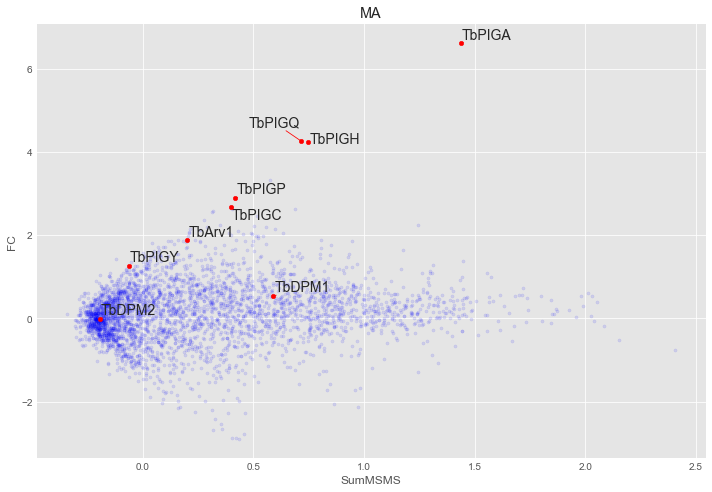

In [8]:
TXT_PATH = os.path.join('RUN_1', 'combined', 'txt')
#TXT_PATH=''
df = pd.read_csv(os.path.join(TXT_PATH, 'proteinGroups.txt'),sep='\t')
df = PTUT.clean_df(df, score=0, unique_pep_threshold=0)
df = PTUT.mod_df(df)

df['desc2'] = [ KnownComponents[g] if g in KnownComponents
               else d  for g,d in zip(df['Gene_id'],df['desc'])]

#tag = 'LFQ intensity'
#tag = 'iBAQ'
#tag='Intensity'
tag='MS/MS count'
bait_cols = [tag+' Bait_'+str(n) for n in range(1,4)]
print(df.shape)
#df = df[df[bait_cols].isna().sum(axis=1)==0]
print(df.shape)
control_cols = [tag+' Control_'+str(n) for n in range(1,4)]
df[bait_cols]=df[bait_cols].replace(0,np.nan)
df[control_cols]=df[control_cols].replace(0,np.nan)

#df = df[df[bait_cols].isna().sum(axis=1)==0] 

df[bait_cols]=df[bait_cols]/df[bait_cols].median()
df[control_cols]=df[control_cols]/df[control_cols].median()

df[bait_cols]=df[bait_cols].replace(np.nan,0)
df[control_cols]=df[control_cols].replace(np.nan,0)
for c in bait_cols+control_cols:
    df[c]=PTUT.impute(df[c])

 
    
df[bait_cols]=df[bait_cols]+df[bait_cols][df[bait_cols]>0].min()
df[control_cols]=df[control_cols]+df[control_cols][df[control_cols]>0].min()


df['FC']=np.log2(df[bait_cols].mean(axis=1,skipna=True)/
                 df[control_cols].mean(axis=1,skipna=True))
df['SumMSMS']=np.log10(df[bait_cols].mean(axis=1,skipna=True)+
                 df[control_cols].mean(axis=1,skipna=True))

fig, ax=plt.subplots(figsize=(12,8), ncols=1, nrows=1)
ids = df[df.Gene_id.isin(KnownComponents.keys())]
_ids = ids.index.values
_names = ids.desc2
print(len(_ids))
print(len(_names))
PTUT.make_vulcano(df, ax, 
                       x='SumMSMS', y='FC', 
             annot_index=_ids,
             annot_names = _names,
             title='MA',
              fc_col = 'log2FC',
                fc_limit=False,
            point_size_selection=20,
    point_size_all=10,
                  text_size=14,
                  alpha_main=0.1
                  
            )



In [9]:
TXT_PATH = os.path.join('RUN_1', 'combined', 'txt')
#TXT_PATH=''
df = pd.read_csv(os.path.join(TXT_PATH, 'proteinGroups.txt'),sep='\t')
df = PTUT.clean_df(df, score=4, unique_pep_threshold=2)
df = PTUT.mod_df(df)
print(df.shape)
df.head()

starting from: (3920, 108)
removed  101 Protein Groups by: Only identified by site
tot  101  entries removed
---------------
removed  37 Protein Groups by: Reverse
tot  138  entries removed
---------------
removed  68 Protein Groups by: Potential contaminant
tot  206  entries removed
---------------
removed  513 Protein Groups by: Score
tot  719  entries removed
---------------
removed  157 Protein Groups by: Peptide counts (unique)
tot  876  entries removed
---------------
(3044, 111)


,Protein IDs,Majority protein IDs,Peptide counts (all),Peptide counts (razor+unique),Peptide counts (unique),Fasta headers,Number of proteins,Peptides,Razor + unique peptides,Unique peptides,...,Peptide is razor,Mod. peptide IDs,Evidence IDs,MS/MS IDs,Best MS/MS,Oxidation (M) site IDs,Oxidation (M) site positions,unique_int,Gene_id,desc
155,Tb05.5K5.110:mRNA-p1;Tb927.5.4460:mRNA-p1;Tb11...,Tb05.5K5.110:mRNA-p1;Tb927.5.4460:mRNA-p1;Tb11...,97;97;55,97;97;55,97;97;55,Tb05.5K5.110:mRNA-p1 | transcript=Tb05.5K5.110...,3,97,97,97,...,True;True;True;True;True;True;True;True;True;T...,1137;1138;1139;1420;1421;1422;2036;2037;2038;2...,4060;4061;4062;4063;4064;4065;4066;4067;4068;4...,4086;4087;4088;4089;4090;4091;4092;4093;4094;4...,4086;4100;5090;5106;7373;7394;9551;9554;12590;...,132;133;134;135;136;137;138;139;140;141;142;143,26;251;256;324;350;389;405;481;726;778;797;828,97,Tb05.5K5.110,"major vault protein, putative"
156,Tb927.5.4470:mRNA-p1;Tb05.5K5.120:mRNA-p1,Tb927.5.4470:mRNA-p1;Tb05.5K5.120:mRNA-p1,6;6,6;6,6;6,Tb927.5.4470:mRNA-p1 | transcript=Tb927.5.4470...,2,6,6,6,...,True;True;True;True;True;True,78;9312;11972;26725;30757;38906,282;31352;40179;90336;104334;104335;104336;131...,293;31589;40513;91507;106130;106131;106132;133...,293;31589;40513;91507;106131;133560,NaN,NaN,6,Tb927.5.4470,"hypothetical protein, conserved"
157,Tb927.5.4500:mRNA-p1;Tb05.5K5.150:mRNA-p1,Tb927.5.4500:mRNA-p1;Tb05.5K5.150:mRNA-p1,12;12,12;12,12;12,Tb927.5.4500:mRNA-p1 | transcript=Tb927.5.4500...,2,12,12,12,...,True;True;True;True;True;True;True;True;True;T...,4603;4604;12302;12303;18730;21963;31296;38901;...,16339;16340;16341;16342;41069;41070;63144;6314...,16455;16456;16457;16458;41445;41446;64072;6407...,16456;41446;64075;75684;107914;133532;136691;1...,144;145;146;147,71;112;146;171,12,Tb927.5.4500,"ras-like small GTPase, putative"
158,Tb927.5.4520:mRNA-p1;Tb05.5K5.160:mRNA-p1,Tb927.5.4520:mRNA-p1;Tb05.5K5.160:mRNA-p1,119;119,119;119,119;119,Tb927.5.4520:mRNA-p1 | transcript=Tb927.5.4520...,2,119,119,119,...,True;True;True;True;True;True;True;True;True;T...,277;896;945;946;1047;1048;2061;2062;2108;2977;...,922;923;924;925;3306;3307;3308;3309;3310;3311;...,898;899;900;901;3346;3347;3348;3349;3350;3351;...,899;3346;3504;3513;3805;7449;7635;10631;10695;...,148;149;150;151;152;153;154;155;156;157;158;15...,1;61;236;287;288;293;401;412;463;479;485;645;7...,119,Tb927.5.4520,Kinetochore interacting protein 1
159,Tb927.5.4560:mRNA-p1;Tb11.v5.0409.1-p1;Tb05.5K...,Tb927.5.4560:mRNA-p1;Tb11.v5.0409.1-p1;Tb05.5K...,18;18;18,18;18;18,18;18;18,Tb927.5.4560:mRNA-p1 | transcript=Tb927.5.4560...,3,18,18,18,...,True;True;True;True;True;True;True;True;True;T...,2226;2249;2328;5540;6138;7201;11827;13812;1538...,7982;7983;7984;7985;7986;7987;7988;8129;8130;8...,7967;7968;7969;7970;7971;7972;7973;8136;8137;8...,7970;8137;8522;19490;21352;24671;39894;46582;5...,166,190,18,Tb927.5.4560,"guanine deaminase, putative"


In [10]:
#ml_df=pd.read_csv('final_df.csv.gz',index_col=[0])
#aboundance_df = ml_df[['Gene ID','Abundance_BSF_pro']]
#aboundance_df.to_csv('aboundance_bsf.csv')
aboundance_df=pd.read_csv('aboundance_bsf.csv',index_col=[0])
aboundance_df.set_index('Gene ID',inplace=True)
aboundance_df['BSF_rank']=aboundance_df['Abundance_BSF_pro'].rank(ascending=False)


#del ml_df
gc.collect()
aboundance_df.head()

,Abundance_BSF_pro,BSF_rank
Gene ID,,
Tb04.24M18.150,5.870638,6864.0
Tb04.3I12.100,NaN,NaN
Tb05.30F7.410,NaN,NaN
Tb05.5K5.10,7.606765,2493.5
Tb05.5K5.100,6.758570,4968.5


In [11]:
df=df.merge(aboundance_df,left_on='Gene_id',right_on='Gene ID',how='left')

In [12]:
KnownComponents={
'Tb11.v5.0765': 'TbGPI3',#
'Tb927.5.3680': 'TbGPI15',
'Tb927.10.10110': 'TbGPI19',
'Tb927.10.6140': 'TbGPI2',
'Tb927.3.4570': 'TbGPI1',
'Tb927.4.780': 'TbERI1',
'Tb927.2.2460': 'UbCE',
#'Tb927.11.3660': 'Dynein',
'Tb927.3.2480': 'TbArv1'
}

In [13]:
df['desc2'] = [ KnownComponents[g] if g in KnownComponents else d 
               for g,d in zip(df['Gene_id'],df['desc'])]

In [14]:
cols = ['Gene_id','desc2','Peptide counts (razor+unique)','Score','Q-value','BSF_rank']
df[df['Gene_id'].isin(KnownComponents.keys())][cols]

,Gene_id,desc2,Peptide counts (razor+unique),Score,Q-value,BSF_rank
56,Tb927.10.6140,TbGPI2,7;7,99.5080,0.0,6796.5
145,Tb11.v5.0765,TbGPI3,30;30,266.3000,0.0,6473.5
263,Tb927.10.10110,TbGPI19,5,137.2400,0.0,6184.0
1472,Tb927.2.2460,UbCE,3,7.7532,0.0,2537.0
1618,Tb927.3.2480,TbArv1,7,31.1090,0.0,NaN
1688,Tb927.3.4570,TbGPI1,22,207.7200,0.0,5284.0
1911,Tb927.4.780,TbERI1,2,4.0123,0.0,NaN
2023,Tb927.5.3680,TbGPI15,8,95.1380,0.0,7037.0


In [15]:
#list(df.columns)

In [16]:
#color palette
palette=['b','b','b','r','r','r']
palette_g = ['r','b']
color_dictionary = { 'b':'Bait','r':'Control'}

In [17]:
tag = 'iBAQ'
#tag='MS/MS count'
bait_cols = [tag+' Bait_'+str(n) for n in range(1,4)]
control_cols = [tag+' Control_'+str(n) for n in range(1,4)]
cols = bait_cols+control_cols
selection = df[cols]
selection.columns = [n.replace(tag+' ','') for n in selection.columns]
selection.head()

,Bait_1,Bait_2,Bait_3,Control_1,Control_2,Control_3
0,111320.0,3.170400e+09,22109000.0,94591.0,2.560300e+09,48395000.0
1,0.0,5.701500e+04,117090.0,3012.0,2.613900e+05,0.0
2,2315200.0,2.823200e+07,1669300.0,17786.0,7.038700e+07,7821200.0
3,1434.6,3.685800e+08,38002000.0,2520.4,2.623900e+08,26151000.0
4,267950.0,1.534700e+06,2145700.0,213240.0,2.638200e+06,5017900.0


In [18]:
print(selection.shape)
all_na = selection.replace(0,np.nan).isna().sum(axis=1)==6
selection=selection[~all_na]
print(selection.shape)

(3044, 6)
(3040, 6)


## iBAQ analysis 

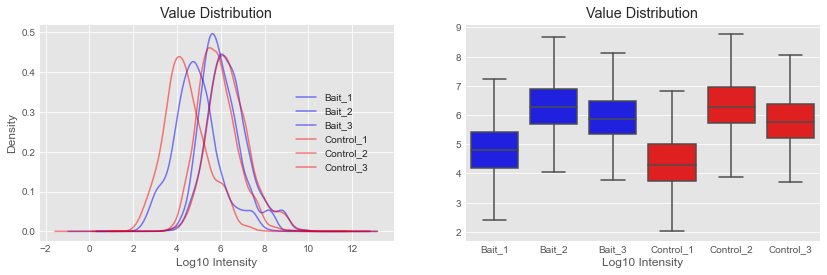

In [19]:
plt.style.use('ggplot')
fig,axes=plt.subplots(ncols=2,nrows=1,figsize=(14,4))

np.log10(selection.replace(0,np.nan)).plot(
    kind='kde', color=palette, alpha=0.5,ax=axes[0])
axes[0].legend(loc='center left', bbox_to_anchor=(0.7, 0.5))
axes[0].set_title('Value Distribution')
axes[0].set_xlabel('Log10 Intensity')

sns.boxplot(data =np.log10(selection.replace(0,np.nan)),
            showfliers=False,palette=palette,ax=axes[1])
plt.title('Value Distribution')
plt.xlabel('Log10 Intensity')
plt.savefig(os.path.join(TXT_PATH, 'value_distribution.png'))
plt.show()

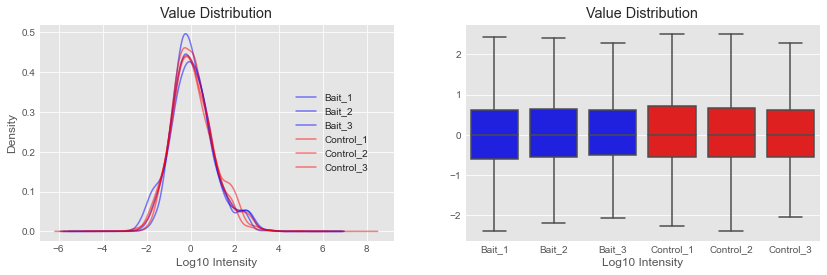

In [20]:
normed_df = selection.copy()
normed_df[['Bait_1','Bait_2','Bait_3']] = normed_df[['Bait_1','Bait_2','Bait_3']].replace(0,np.nan)
normed_df[['Bait_1','Bait_2','Bait_3']] = normed_df[['Bait_1','Bait_2','Bait_3']]/normed_df[['Bait_1','Bait_2','Bait_3']].median()

normed_df[['Control_1','Control_2','Control_3']] = normed_df[['Control_1','Control_2','Control_3']].replace(0,np.nan)
normed_df[['Control_1','Control_2','Control_3']] = normed_df[['Control_1','Control_2','Control_3']]/normed_df[['Control_1','Control_2','Control_3']].median()


fig,axes=plt.subplots(ncols=2,nrows=1,figsize=(14,4))

np.log10(normed_df.replace(0,np.nan)).plot(
    kind='kde', color=palette, alpha=0.5,ax=axes[0])
axes[0].legend(loc='center left', bbox_to_anchor=(0.7, 0.5))
axes[0].set_title('Value Distribution')
axes[0].set_xlabel('Log10 Intensity')

sns.boxplot(data =np.log10(normed_df.replace(0,np.nan)),
            showfliers=False,palette=palette,ax=axes[1])
plt.title('Value Distribution')
plt.xlabel('Log10 Intensity')
plt.savefig(os.path.join(TXT_PATH, 'value_distribution.png'))
plt.show()



## Missing Data

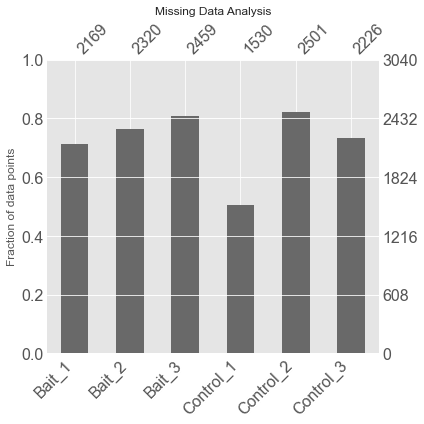

In [21]:
import missingno as msno
import numpy as np
import matplotlib.pyplot as plt
#visualization of missing data
ax=msno.bar(selection.replace(0,np.nan),figsize=(6, 6))
plt.title('Missing Data Analysis',size=12)
ax.set_ylabel('Fraction of data points',size=12)
plt.tight_layout()
plt.savefig('missing.png')
plt.show()

## Proteins Found only in bait

In [22]:
bait_nan = selection[['Bait_1','Bait_2','Bait_3']].replace(0,np.nan).isna().sum(axis=1)
control_nan  = selection[['Control_1','Control_2','Control_3']].replace(0,np.nan).isna().sum(axis=1)
only_bait = selection[(bait_nan==0) & (control_nan==3)]
only_control = selection[(bait_nan==3) & (control_nan<3)]
print(' Found only in Bait:',only_bait.shape[0],'\n',
      'Found only in Control:',only_control.shape[0])

 Found only in Bait: 20 
 Found only in Control: 103


In [23]:
#selection[['Bait_1','Bait_2','Bait_3']] = selection[['Bait_1','Bait_2','Bait_3']].replace(0,np.nan)
#selection[['Bait_1','Bait_2','Bait_3']] = selection[['Bait_1','Bait_2','Bait_3']]/selection[['Bait_1','Bait_2','Bait_3']].median()
only_bait['mean']=normed_df[['Bait_1','Bait_2','Bait_3']].replace(0,np.nan).mean(axis=1)
to_look = only_bait.sort_values('mean', ascending=False).index.values
temp = df.loc[to_look]
temp=temp.join(normed_df[['Bait_1','Bait_2','Bait_3']])
temp['mean']=temp[['Bait_1','Bait_2','Bait_3']].replace(0,np.nan).mean(axis=1,skipna=True)
temp['exp_rank']=temp['mean'].rank(ascending=False)
temp['rank_filter']=np.log2(temp['BSF_rank']/temp['exp_rank'])
temp[['Gene_id','mean','Bait_1','Bait_2','Bait_3','desc2','Score','BSF_rank','exp_rank','rank_filter']].head(20)

,Gene_id,mean,Bait_1,Bait_2,Bait_3,desc2,Score,BSF_rank,exp_rank,rank_filter
145,Tb11.v5.0765,406.619194,857.831705,119.147760,242.878116,TbGPI3,266.3000,6473.5,1.0,12.660330
2023,Tb927.5.3680,223.519135,482.792310,82.289220,105.475875,TbGPI15,95.1380,7037.0,2.0,11.780745
263,Tb927.10.10110,137.323097,268.515600,78.077763,65.375928,TbGPI19,137.2400,6184.0,3.0,11.009362
56,Tb927.10.6140,26.353724,54.448471,21.611628,3.001073,TbGPI2,99.5080,6796.5,4.0,10.730576
1688,Tb927.3.4570,13.543876,20.639773,17.172465,2.819391,TbGPI1,207.7200,5284.0,5.0,10.045487
1618,Tb927.3.2480,12.919078,20.335645,16.003537,2.418052,TbArv1,31.1090,NaN,6.0,NaN
1911,Tb927.4.780,5.472886,12.954302,2.741537,0.722818,TbERI1,4.0123,NaN,7.0,NaN
1472,Tb927.2.2460,2.699445,2.264419,2.771437,3.062481,UbCE,7.7532,2537.0,8.0,8.308908
1183,Tb927.11.3660,2.150475,3.658367,0.509255,2.283802,"dynein light chain Tctex-type, putative",20.8370,1400.0,9.0,7.281286
2359,Tb927.7.3920,1.300795,1.656477,2.013264,0.232643,"hypothetical protein, conserved",25.5930,1274.0,10.0,6.993221


In [24]:
temp.to_csv('only_bait.csv')

In [25]:
#print(selection.shape)
#selection=selection[(bait_nan==0)]
#print(selection.shape)

## Differential Abundance

### ProtRank indata

In [26]:
indata_prank=selection.join(df[['Gene_id']],how='left')
indata_prank.set_index('Gene_id',drop=True,inplace=True)
indata_prank=indata_prank
indata_prank.to_csv(os.path.join(TXT_PATH, 'indata_ProtRank.csv'))
indata_prank.head()

,Bait_1,Bait_2,Bait_3,Control_1,Control_2,Control_3
Gene_id,,,,,,
Tb05.5K5.110,111320.0,3.170400e+09,22109000.0,94591.0,2.560300e+09,48395000.0
Tb927.5.4470,0.0,5.701500e+04,117090.0,3012.0,2.613900e+05,0.0
Tb927.5.4500,2315200.0,2.823200e+07,1669300.0,17786.0,7.038700e+07,7821200.0
Tb927.5.4520,1434.6,3.685800e+08,38002000.0,2520.4,2.623900e+08,26151000.0
Tb927.5.4560,267950.0,1.534700e+06,2145700.0,213240.0,2.638200e+06,5017900.0


### ProtRank Test

In [27]:
what_to_compare = [[['Control_1', 'Bait_1'], ['Control_2', 'Bait_2' ], ['Control_3', 'Bait_3', ]]]
ProtRank.data_stats(indata_prank, what_to_compare = what_to_compare)
description = 'bait_vs_control'
significant_proteins = ProtRank.rank_proteins(
    indata_prank+indata_prank[indata_prank>0].min(), 
    what_to_compare, description,
    path_to=TXT_PATH,num_bootstrap_realizations=100)


input data contain results for 3040 proteins and 6 different conditions
list of measured conditions: Bait_1, Bait_2, Bait_3, Control_1, Control_2, Control_3
in the data, 27.6% of all counts are zeros

basic statistics for the subset of the data corresponding to the provided comparisons:
6 comparisons provided: [[['Control_1', 'Bait_1'], ['Control_2', 'Bait_2'], ['Control_3', 'Bait_3']]]
after ignoring 0 rows with only zero counts, 3040 rows remain
in the analyzed data, 27.6% of all counts are zeros
median count is 5.46e+05 (computed over non-zero entries only)
ratio between the largest and the smallest non-zero count is 8.19e+07
ratio between the 90th and the 10th percentile non-zero count is 9.84e+02
statistics of irregular missing values:
  in total, there are 2205 comparisons involving a zero and a non-zero value (24.2% of all)
  out of 9120 comparisons, 449 involve a zero value and a non-zero exceeding 1.0 * median (4.9% of all)
  (the smaller the fraction, the smaller the problem

In [28]:
df[df['Gene_id'].isin(significant_proteins)][['Gene_id',
                                              'desc2']]

,Gene_id,desc2
56,Tb927.10.6140,TbGPI2
145,Tb11.v5.0765,TbGPI3
263,Tb927.10.10110,TbGPI19
842,Tb927.11.10770,"VHS domain containing protein, putative"
1183,Tb927.11.3660,"dynein light chain Tctex-type, putative"
1472,Tb927.2.2460,UbCE
1618,Tb927.3.2480,TbArv1
1688,Tb927.3.4570,TbGPI1
1911,Tb927.4.780,TbERI1
2023,Tb927.5.3680,TbGPI15


In [29]:
temp_1 = pd.read_csv(os.path.join(TXT_PATH,'prs-bait_vs_control.dat'),
                   sep='\t', comment='#', index_col=[0],
                   names=['Gene_id','rank','FDR','sign'])
temp_1['log_FDR']=-np.log10(temp_1['FDR']+0.01)
temp_1['log_rank']=np.log10(temp_1['rank'])
temp_1['srank']=[n*1 if a=='+' else n*-1 for n,a in zip(temp_1['rank'],temp_1['sign'])]
temp_1=temp_1.merge(df,left_on='Gene_id',right_on='Gene_id',how='left')
#temp_1=temp_1.merge(aboundance_df,left_on='Gene_id',right_on='Gene ID',how='left')
temp_1['exp_rank']=temp_1['rank'].rank(ascending=False)
temp_1['rank_filter']=np.log2(temp_1['BSF_rank']/temp_1['exp_rank'])
temp_1['BSF_rank2']=temp_1['BSF_rank'].fillna(temp_1['BSF_rank'].max())

temp_1.head(50)
temp_1.to_csv('all.txt')

In [30]:
temp_1.head(10)

,Gene_id,rank,FDR,sign,log_FDR,log_rank,srank,Protein IDs,Majority protein IDs,Peptide counts (all),...,Oxidation (M) site IDs,Oxidation (M) site positions,unique_int,desc,Abundance_BSF_pro,BSF_rank,desc2,exp_rank,rank_filter,BSF_rank2
0,Tb11.v5.0765,661.404659,0.00000,+,2.000000,2.820467,661.404659,Tb11.v5.0765.1-p1;Tb927.2.1780:mRNA-p1,Tb11.v5.0765.1-p1;Tb927.2.1780:mRNA-p1,30;30,...,523;524;525;526;527;528;529;530;531,58;66;80;87;195;257;264;269;382,30,N-acetylglucosaminyl-phosphatidylinositol bios...,6.102938,6473.5,TbGPI3,1.0,12.660330,6473.5
1,Tb927.5.3680,441.432077,0.00000,+,2.000000,2.644864,441.432077,Tb927.5.3680:mRNA-p1,Tb927.5.3680:mRNA-p1,8,...,NaN,NaN,8,"GPI-GlcNAc transferase complex, PIG-H componen...",5.683547,7037.0,TbGPI15,2.0,11.780745,7037.0
2,Tb927.10.10110,341.436189,0.00000,+,2.000000,2.533310,341.436189,Tb927.10.10110:mRNA-p1,Tb927.10.10110:mRNA-p1,5,...,NaN,NaN,5,"PIG-P, putative",6.245562,6184.0,TbGPI19,3.0,11.009362,6184.0
3,Tb927.10.6140,225.351104,0.00000,+,2.000000,2.352860,225.351104,Tb927.10.6140:mRNA-p1;Tb11.v5.0206.1-p1,Tb927.10.6140:mRNA-p1;Tb11.v5.0206.1-p1,7;7,...,257,340,7,phosphatidylinositolN- acetylglucosaminyltrans...,5.932532,6796.5,TbGPI2,4.0,10.730576,6796.5
4,Tb927.3.4570,191.344078,0.00200,+,1.920819,2.281815,191.344078,Tb927.3.4570:mRNA-p1,Tb927.3.4570:mRNA-p1,22,...,3059;3060;3061;3062;3063;3064,85;173;194;207;716;721,22,"N-acetylglucosamyl transferase component GPI1,...",6.640929,5284.0,TbGPI1,5.0,10.045487,5284.0
5,Tb927.3.2480,172.718617,0.00200,+,1.920819,2.237339,172.718617,Tb927.3.2480:mRNA-p1,Tb927.3.2480:mRNA-p1,7,...,NaN,NaN,7,"Arv1-like family, putative",NaN,NaN,TbArv1,6.0,NaN,7125.0
6,Tb927.2.2460,107.118431,0.01143,+,1.668978,2.029864,107.118431,Tb927.2.2460:mRNA-p1,Tb927.2.2460:mRNA-p1,3,...,NaN,NaN,3,"ubiquitin-conjugating enzyme E2, putative",7.592215,2537.0,UbCE,7.0,8.501553,2537.0
7,Tb927.4.780,97.868516,0.01500,+,1.602060,1.990643,97.868516,Tb927.4.780:mRNA-p1,Tb927.4.780:mRNA-p1,2,...,3489;3490;3491,1;51;54,2,Phosphatidylinositol N-acetylglucosaminyltrans...,NaN,NaN,TbERI1,8.0,NaN,7125.0
8,Tb927.11.10770,74.909820,0.04333,-,1.273028,1.874539,-74.909820,Tb927.11.10770:mRNA-p1,Tb927.11.10770:mRNA-p1,9,...,NaN,NaN,9,"VHS domain containing protein, putative",7.334745,3254.0,"VHS domain containing protein, putative",9.0,8.498074,3254.0
9,Tb927.11.3660,72.984713,0.04333,+,1.273028,1.863232,72.984713,Tb927.11.3660:mRNA-p1,Tb927.11.3660:mRNA-p1,2,...,NaN,NaN,2,"dynein light chain Tctex-type, putative",8.123442,1400.0,"dynein light chain Tctex-type, putative",10.0,7.129283,1400.0


In [31]:

def cm2inch(*tupl):
    inch = 2.54
    if isinstance(tupl[0], tuple):
        return tuple(i/inch for i in tupl[0])
    else:
        return tuple(i/inch for i in tupl)
cm2inch(19, 9.5)

(7.480314960629921, 3.7401574803149606)

## Fig2 Static

8
8
no selection


No handles with labels found to put in legend.


no selection


No handles with labels found to put in legend.


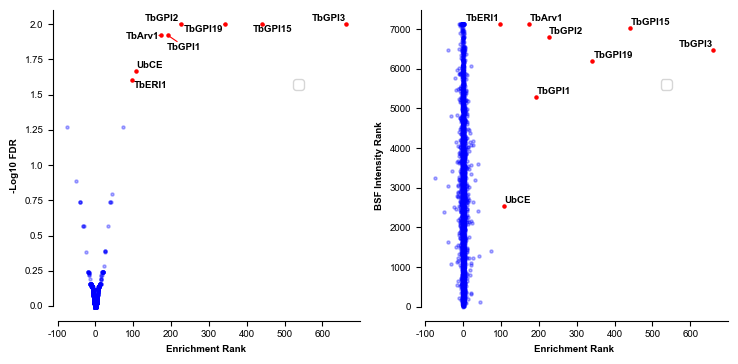

In [33]:
#ax.spines['left'].set_bounds(ymin+small_add, ymax)

#xmin, xmax = ax.get_xlim()
#ax.set_xlim(xmin,xmax)

#ax.spines['bottom'].set_bounds(xmin+0.5, xmax)
fontProperties = {'family':'Arial',
    'weight' : 'normal', 'size' : 7}
fontProperties_names = {'family':'Arial',
    'weight' : 'bold', 'size' : 7}

plt.style.use('fivethirtyeight')
plt.style.use('default')



fig, axes=plt.subplots(figsize=(7.48,3.74), 
                     ncols=2, nrows=1)

ids = temp_1[(temp_1['srank']>40) & (temp_1['log_FDR']>1.3)]
_ids = ids.index.values
_names = ids['desc2'].values
print(len(_ids))
print(len(_names))
ax=axes[0]
PTUT.make_vulcano(temp_1, ax, x='srank', y='log_FDR', 
             annot_index=_ids,
             annot_names = _names,
             title='',
             #fc_limit=70,
             fc_col='srank',
                  alpha_main=0.3,
             point_size_selection=5,
             point_size_all=5,
            text_size=7,
                  fontdict=fontProperties_names
            )

#ax.set_title('PIG-A interacting partners')
ax.set_xlabel('Enrichment Rank',fontdict=fontProperties_names)
ax.set_ylabel('-Log10 FDR',fontdict=fontProperties_names)
#ax.legend(loc='upper center', bbox_to_anchor=(1.1, 0.9),
#          title='Legend')
#ax.yaxis.label.set_size(18)
#ax.xaxis.label.set_size(18)
#ax.title.set_size(18)
ax.tick_params(axis='both', which='major', labelsize=7)





temp_xticks=[int(n) for n in np.arange(-100,700,100)]
ax.set_xticks(temp_xticks)
ax.set_xticklabels(temp_xticks, fontProperties)
ax.set_yticklabels(ax.get_yticks(), fontProperties)

ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
xmin, xmax = ax.get_xlim()
ax.spines['bottom'].set_bounds(-100, 700)
ymin, ymax = ax.get_ylim()
ax.spines['left'].set_bounds(0, ymax)




#ax.text(-0.1, 1, 'A)', horizontalalignment='center', 
#               verticalalignment='center',
#               transform=ax.transAxes,fontsize=16)

ax=axes[1]
PTUT.make_vulcano(temp_1, ax, x='srank', 
                  y='BSF_rank2', 
             annot_index=_ids,
             annot_names = _names,
             title='',
             #fc_limit=70,
             fc_col='srank',
            alpha_main=0.3,
             point_size_selection=5,
             point_size_all=5,
            text_size=7,
                  fontdict=fontProperties_names
            )

#ax.set_title('PIG-A interacting partners')
ax.set_xlabel('Enrichment Rank',fontdict=fontProperties_names)
ax.set_ylabel('BSF Intensity Rank',fontdict=fontProperties_names)
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')



#ax.legend(loc='upper center', bbox_to_anchor=(1.1, 0.9),
#          title='Legend')
#ax.yaxis.label.set_size(18)
#ax.xaxis.label.set_size(18)
#ax.title.set_size(18)
temp_xticks=[int(n) for n in np.arange(-100,700,100)]
ax.set_xticks(temp_xticks)
ax.set_xticklabels(temp_xticks, fontProperties)
ax.set_yticklabels([int(n) for n in ax.get_yticks()], fontProperties)

xmin, xmax = ax.get_xlim()
ax.spines['bottom'].set_bounds(-100, 700)
ymin, ymax = ax.get_ylim()
ax.spines['left'].set_bounds(0, ymax)

#ax.text(-0.1, 1, 'B)', horizontalalignment='center', 
#               verticalalignment='center',
#               transform=ax.transAxes,fontsize=16)

#plt.suptitle('TbPIGA Interacting Partners')
plt.tight_layout()
plt.savefig('Fig2.svg')

plt.savefig('Fig2.png')
plt.show()

#w 190 mm 
#h 95 mm 
#font 7pt and Arial
#x/y axes annotation Arial 7pt bold
#top 10

## Fig2 Interactive

In [34]:
import plotly.express as px
from plotly.subplots import make_subplots



fig1 = px.scatter(temp_1, x='srank', y='log_FDR', #color="log_FDR",
                 #title='PIGA interacting partners',
                 width=800, height=600,
                 hover_name="Gene_id", hover_data=["desc2"],
                 #color_continuous_scale='Bluered',#px.colors.sequential.Viridis,
                )


fig2 = px.scatter(temp_1, x='srank', y='BSF_rank2', #color="log_FDR",
                 #title='PIGA interacting partners',
                 width=800, height=600,
                 hover_name="Gene_id", hover_data=["desc2"],
                 #color_continuous_scale='Bluered',#px.colors.sequential.Viridis,
                )



trace1 = fig1['data'][0]
trace2 = fig2['data'][0]

fig = make_subplots(rows=1, cols=2, shared_xaxes=False,shared_yaxes=False)
fig.add_trace(trace1, row=1, col=1)
fig.add_trace(trace2, row=1, col=2)

fig.layout["xaxis"].title.text = "Experiment Rank"
fig.layout["xaxis2"].title.text = "Experiment Rank"
fig.layout["yaxis"].title.text = "Log10 FDR"
fig.layout["yaxis2"].title.text = "BSF Intensity Rank"
fig.update_layout(title_text='TbPIGA Interacting Partners')
#fig.show()
fig.write_html("PIGA.html")

In [35]:
from IPython.display import IFrame
IFrame("PIGA.html", width=1000, height=600)

In [36]:
temp_1.to_csv('Dataset.csv')

In [37]:
from IPython.display import FileLink, FileLinks
FileLink('Dataset.csv')

/Users/mtinti/Desktop/git_projects/zhe/PIG-A/Dataset.csv

In [39]:
!jupyter nbconvert --to html_toc make_figure.ipynb

[NbConvertApp] Converting notebook make_figure.ipynb to html_toc
[NbConvertApp] Support files will be in make_figure_files/
[NbConvertApp] Making directory make_figure_files
[NbConvertApp] Making directory make_figure_files
[NbConvertApp] Making directory make_figure_files
[NbConvertApp] Making directory make_figure_files
[NbConvertApp] Making directory make_figure_files
[NbConvertApp] Writing 408817 bytes to make_figure.html
